In [1]:
from sklearn import tree
import graphviz 
import pydotplus
import pandas as pd
import numpy as np

In [2]:
#load data
data_df = pd.read_csv("../db/stock_data_with_perf_fixed.csv")
data_df.columns

C:\Users\rpaul\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['name', 'ticker', 'Quarter end', 'Shares', 'Shares split adjusted',
       'Split factor', 'Assets', 'Current Assets', 'Liabilities',
       'Current Liabilities', 'Shareholders equity',
       'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio', 'mktcap_revenue_value', '

In [3]:
#specify the features(measures) and target (label) to be used

#get features data to be used
features_columns = ['EPS basic','ROE','ROA', 'P/B ratio', 'P/E ratio', 'Dividend payout ratio',
                   'Long-term debt to equity ratio', 'Equity to assets ratio', 'Free cash flow per share',
                   'Current ratio', 'mktcap_revenue_value', 'mktcap_free_cash_flow_value',
                   'mktcap_cash_value', 'cash_oper_gt_earnings_value',
                   'entvalue_earnings_value', 'marketcap_bookvalue_value']

features_data_df = data_df[features_columns]
data = features_data_df.values

#get target data
target_values = ['no','yes']

selected_target_column = 'five_year_return'

data_df.loc[data_df[selected_target_column] > 0.0, 'Value_stock'] = 1
data_df.loc[data_df[selected_target_column] <= 0.0, 'Value_stock'] = 0
target = data_df['Value_stock'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [4]:
#create decision tree model, full depth
dtc_model = tree.DecisionTreeClassifier()
#fit the model with data
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")


Training data score: 0.9999772535996179
Test data score: 0.6879563288979871


In [11]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 2)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")


Training data score: 0.6902850123967882
Test data score: 0.6906175366769021


In [6]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 3)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.6921047244273594
Test data score: 0.687683384510406


In [13]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 4)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.7030002502104042
Test data score: 0.6956670078471512


In [8]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 5)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.7087095967063213
Test data score: 0.6960764244285227


In [9]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 6)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.7141459863976526
Test data score: 0.6998294097577619


In [10]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 7)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.7193321656847804
Test data score: 0.7000341180484476


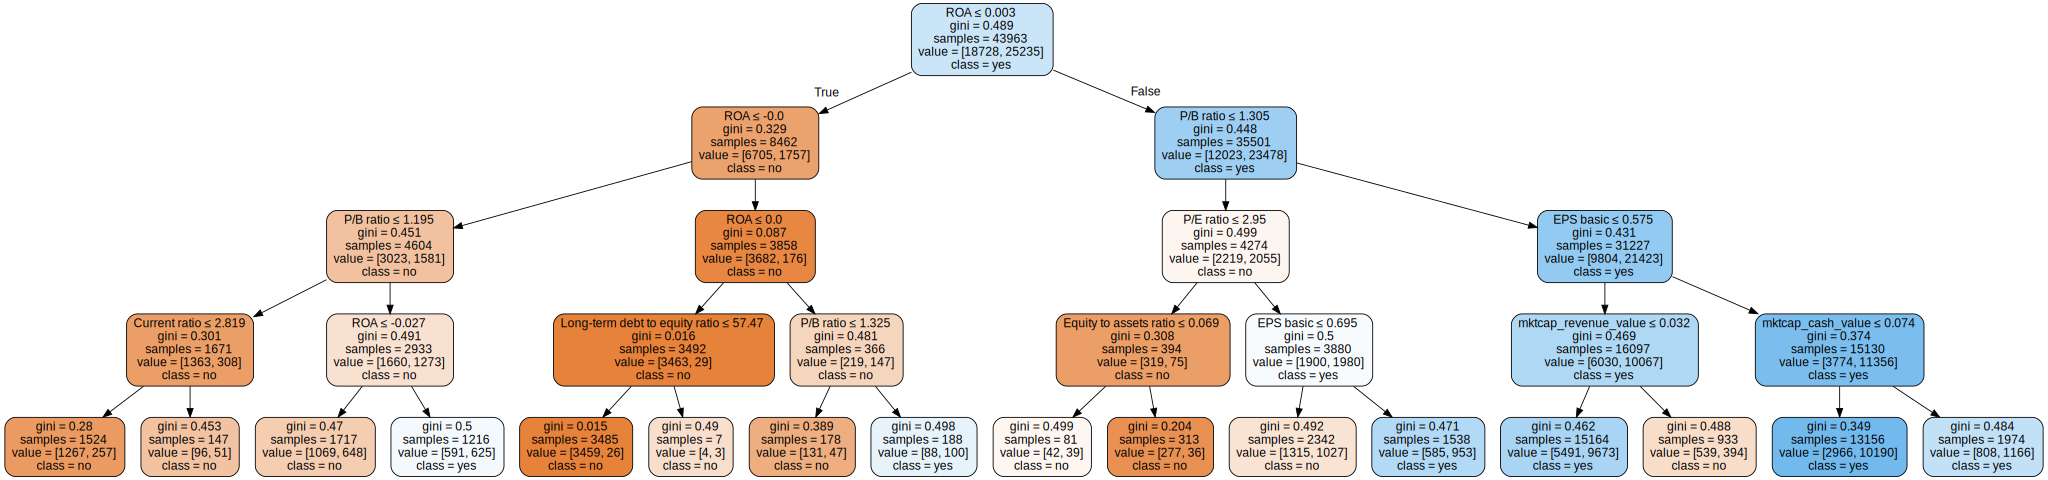

In [14]:
#run the selected model again before executing this

#plot the decision tree
dot_data = tree.export_graphviz(
    dtc_model, out_file=None, 
    feature_names=features_columns,  
    class_names=target_values,  
    filled=True, rounded=True,  
    special_characters=True)  

#change file name
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('DT_5yr_4L.png')

graph = graphviz.Source(dot_data)  
graph 